In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "./Group4_5.17mm/slice-boundary1.txt"
df = pd.read_csv(filename, sep="\t",encoding='ISO-8859-1')
df = df.dropna()
df

,Distance [µm],z [µm]
0,0.00,2.85375
1,0.25,2.96183
2,0.50,3.17042
3,0.75,3.17179
4,1.00,2.95408
5,1.25,2.89302
6,1.50,2.48153
7,1.75,2.94442
8,2.00,3.45970
9,2.25,3.10375


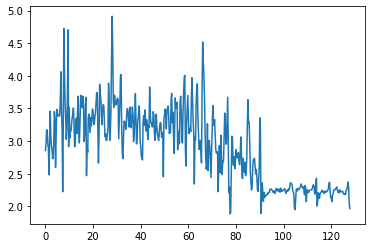

In [3]:
fig, ax = plt.subplots()
ax.plot(df.iloc[:,0], df.iloc[:,1])

In [4]:
df_sample = df[df.iloc[:, 0] < 50]#sample area is <50µm
df_substrate = df[df.iloc[:, 0] > 100]#substrate area is >100µm
mean_height_sample = df_sample['z [µm]'].mean()
mean_height_substrate = df_substrate['z [µm]'].mean()
thickness = mean_height_sample-mean_height_substrate
print(thickness)

1.0776509678571435


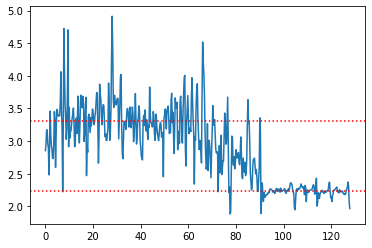

In [5]:
fig, ax = plt.subplots()
ax.plot(df.iloc[:,0], df.iloc[:,1])
ax.axhline(mean_height_sample, color='r', linestyle=':')
ax.axhline(mean_height_substrate, color='r', linestyle=':')

In [6]:
deviations_sample = df_sample['z [µm]'] - mean_height_sample
Ra = np.abs(deviations_sample).mean()
Rq = np.sqrt((deviations_sample**2).mean())
Rzn = df_sample['z [µm]'].max()-df_sample['z [µm]'].min()
Ra,Rq,Rzn

(0.26358102799999994, 0.36755411462966586, 2.6891500000000006)

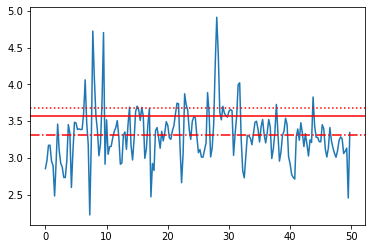

In [7]:
fig, ax = plt.subplots()
ax.plot(df_sample.iloc[:,0], df_sample.iloc[:,1])
ax.axhline(mean_height_sample, color='r', linestyle='-.')
ax.axhline(mean_height_sample+Ra, color='r', linestyle='-')
ax.axhline(mean_height_sample+Rq, color='r', linestyle=':')

   #Slice        Ra        Rq      Rzn  Thickness
0     1.0  0.263581  0.367554  2.68915   1.077651
1     2.0  0.263581  0.367554  2.68915   1.077651
2     3.0  0.263581  0.367554  2.68915   1.077651
3     4.0  0.263581  0.367554  2.68915   1.077651
4     5.0  0.263581  0.367554  2.68915   1.077651 2.6891500000000006 1.0776509678571435


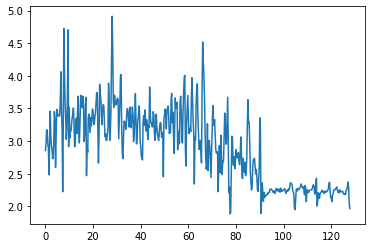

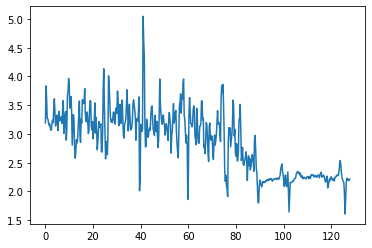

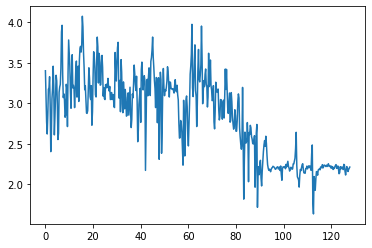

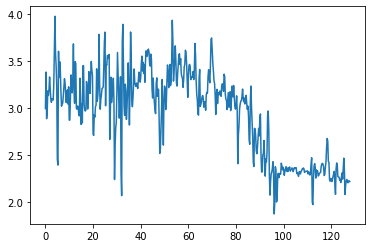

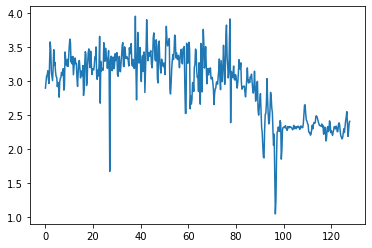

In [10]:
result_df_sample = pd.DataFrame()
for i in range(5):
    filename = f"./Group4_5.17mm/slice-boundary{i+1}.txt"
    df_sample = pd.read_csv(filename, sep="\t",encoding='ISO-8859-1')
    df_sample = df_sample.dropna()
    fig, ax = plt.subplots()
    ax.plot(df_sample.iloc[:,0], df_sample.iloc[:,1])
    df_sample = df[df.iloc[:, 0] < 50]#sample area is <50µm
    df_substrate = df[df.iloc[:, 0] > 100]#substrate area is >100µm
    mean_height_sample = df_sample['z [µm]'].mean()
    mean_height_substrate = df_substrate['z [µm]'].mean()
    thickness = mean_height_sample-mean_height_substrate
    mean_height_sample = df_sample['z [µm]'].mean()
    deviations_sample = df_sample['z [µm]'] - mean_height_sample
    Ra = np.abs(deviations_sample).mean()
    Rq = np.sqrt((deviations_sample**2).mean())
    Rzn = df_sample['z [µm]'].max()-df_sample['z [µm]'].min()
    result_df_sample = result_df_sample.append({'#Slice': i+1,'Thickness':thickness, 'Ra': Ra, 'Rq': Rq, 'Rzn': Rzn}, ignore_index=True)
Rz = result_df_sample['Rzn'].mean()
mean_thickness = result_df_sample['Thickness'].mean()
print(result_df_sample,Rz,mean_thickness)
result_df_sample.to_csv('roughness.csv')